In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import gc
import os
import shutil

In [2]:
torch.cuda.empty_cache()
gc.collect()

0

In [3]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")


Using GPU: Tesla P100-PCIE-16GB


In [4]:
# Function to run inference on a single image
def infer_image(model, image_path, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0) # Add batch dimension
    image = image.to('cuda')
    
    with torch.no_grad():
        model.eval()
        output = model(image)
        _, predicted = torch.max(output, 1)
    
    return predicted.item()

In [11]:
# Load your model (ensure it's on the correct device, e.g., CPU or GPU)
model = torch.load('./pth/far_shah-b1-b2_cln_pretrained_ep3.pth')
model.to('cuda')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
# Define the transform
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [14]:
def merge_files_to_directory(source_dir, target_dir):

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for subdir, _, files in os.walk(source_dir):
        for file in files:
            # Construct the full file path
            file_path = os.path.join(subdir, file)
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)

            # Check if file already exists in target directory
            if os.path.exists(target_file_path):
                print(f"File already exists: {target_file_path}")
                # Optionally, handle duplicates by renaming, skipping, or overwriting
            else:
                # Move or copy the file
                shutil.copy(file_path, target_file_path)  # Use shutil.copy() if you want to copy instead of move

    print(f"All files have been merged into {target_dir}")


In [15]:
merge_files_to_directory("../../data/classifier/far_shah-b1-b2_cln/test", "../../data/classifier/far_shah-b1-b2_cln/inf")

File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22564.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22568.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22594.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/EKkls8OGnUzYe9sc-atcc_ss-263.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22591.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22567.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBulcDu-rutube_ss-22588.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/zYTCJOBE9sQiheq9-msn_ss-5762.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/7hDuaqnPOVoDfg9I-toprankers_ss-7673.png
File already exists: ../../data/classifier/far_shah-b1-b2_cln/inf/MqpKBrgWVZBu

In [16]:
# Directory containing images
inf_dir = '../../data/classifier/far_shah-b1-b2_cln/inf'

# List all files in the directory
image_paths = [os.path.join(inf_dir, f) for f in os.listdir(inf_dir) if os.path.isfile(os.path.join(inf_dir, f))]

In [17]:
# Run inference on each image and store results
results = []
for image_path in image_paths:
    prediction = infer_image(model, image_path, transform)
    results.append((image_path, prediction))

In [18]:
classes = sorted(os.listdir("../../data/classifier/far_shah-b1-b2_cln/test"))
class_labels = {}
for i, one in enumerate(classes):
    class_labels.update({i: one})
    

../../data/classifier/far_shah-b1-b2_cln/inf/yvr4WxTteNoWdirO-dafont_ss-22395.png 25
../../data/classifier/far_shah-b1-b2_cln/inf/8S60HAQ91OL8r2OH-aleks_ss-5229.png 25
../../data/classifier/far_shah-b1-b2_cln/inf/4JKG43eQp1Qx0Kpl-asu_ss-11266.png 25
../../data/classifier/far_shah-b1-b2_cln/inf/4S84aPZdSBhByStv-crashlytics_ss-17556.png 10
../../data/classifier/far_shah-b1-b2_cln/inf/ctlpTpBKNzSlj4zf-nexusmods_ss-22436.png 25


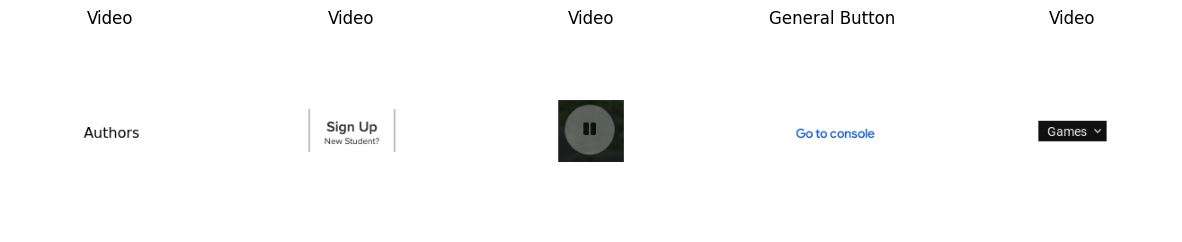

In [26]:
# Display a random subset of images with predictions
num_images_to_show = 5  # Set the number of images you want to display
display_indices = random.sample(range(len(results)), num_images_to_show)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(display_indices, 1):
    image_path, pred_ind = results[idx]
    
    print(image_path, pred_ind)
    image = Image.open(image_path)

    plt.subplot(1, num_images_to_show, i)
    plt.imshow(image)
    plt.title(f"{class_labels[pred_ind]}")
    plt.axis('off')

plt.show()